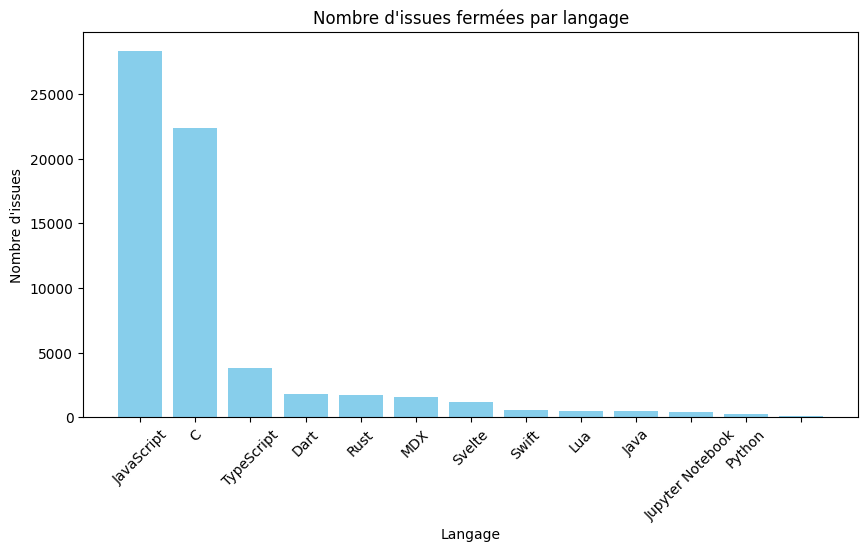

In [1]:
import pymongo
import pandas as pd
import matplotlib.pyplot as plt

# Connexion à MongoDB
uri = "mongodb://mongodb:27017/"
client = pymongo.MongoClient(uri)
db = client["github_issues"]
collection = db["closed_issues"]

# Charger les issues dans un DataFrame
df = pd.DataFrame(list(collection.find()))

# Compter le nombre d'issues par langage
lang_count = df["language"].value_counts()

# Tracer le graphique
plt.figure(figsize=(10, 5))
plt.bar(lang_count.index, lang_count.values, color='skyblue')
plt.xlabel("Langage")
plt.ylabel("Nombre d'issues")
plt.title("Nombre d'issues fermées par langage")
plt.xticks(rotation=45)
plt.show()


In [2]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df["duration"], bins=20, kde=True, color="purple")
plt.xlabel("Durée de résolution (jours)")
plt.ylabel("Nombre d'issues")
plt.title("Distribution des durées de résolution des issues")
plt.show()


ModuleNotFoundError: No module named 'seaborn'

In [4]:
df["closed_at"] = pd.to_datetime(df["closed_at"].apply(lambda x: x["$date"] if isinstance(x, dict) and "$date" in x else None))
df["created_at"] = pd.to_datetime(df["created_at"].apply(lambda x: x["$date"] if isinstance(x, dict) and "$date" in x else None))


# Grouper par jour
issues_per_day = df.resample('D', on='closed_at').size()

# Tracer
plt.figure(figsize=(12, 5))
plt.plot(issues_per_day.index, issues_per_day.values, marker="o", linestyle="-", color="red")
plt.xlabel("Date")
plt.ylabel("Issues fermées")
plt.title("Nombre d'issues fermées par jour")
plt.grid()
plt.show()


AttributeError: 'NaTType' object has no attribute 'normalize'